C:\Users\LabStudent\AppData\Local\Temp\ipykernel_8028\1084897266.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\LabStudent\AppData\Local\Temp\ipykernel_8028\1084897266.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Accuracy of SVM: 0.33


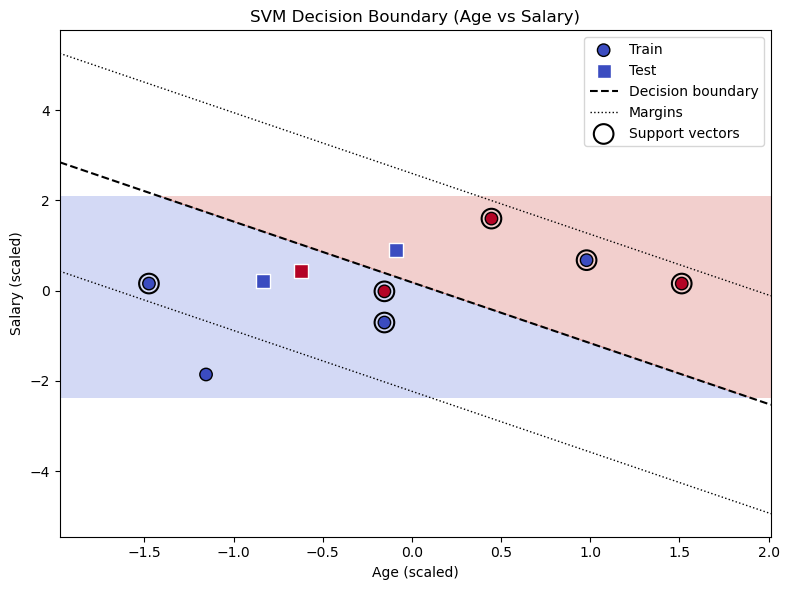

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data
data = {
    'Age':[25,30, np.nan,22,40,35,np.nan,28,50,45],
    'Salary':[50000,60000,55000,np.nan,65000,62000,58000,59000,np.nan,61000],
    'Department':['Sales','Engineering','Sales','Marketing','Engineering','Marketing','Sales',np.nan,'Engineering','Marketing'],
    'LeftCompany':[0,1,0,0,1,0,1,0,1,0]
}
df = pd.DataFrame(data)

# Impute missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df['Department'].fillna('Unknown', inplace=True)

# Encode categorical (kept for model but not used in 2D plot)
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])

# Features and target
X = df[['Age','Salary','Department']]
y = df['LeftCompany']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale Age and Salary (fit on train only)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Age','Salary']] = scaler.fit_transform(X_train[['Age','Salary']])
X_test_scaled[['Age','Salary']] = scaler.transform(X_test[['Age','Salary']])

# Train SVM on scaled Age and Salary (2D)
model = SVC(kernel='linear')
model.fit(X_train_scaled[['Age','Salary']], y_train)

# Evaluate
y_pred = model.predict(X_test_scaled[['Age','Salary']])
print(f"Accuracy of SVM: {accuracy_score(y_test, y_pred):.2f}")

# Plot decision boundary, margins, support vectors
plt.figure(figsize=(8,6))

# Meshgrid in scaled space
x_min, x_max = X_train_scaled['Age'].min() - 0.5, X_train_scaled['Age'].max() + 0.5
y_min, y_max = X_train_scaled['Salary'].min() - 0.5, X_train_scaled['Salary'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.coolwarm)

# Plot training points
plt.scatter(X_train_scaled['Age'], X_train_scaled['Salary'], c=y_train,
            cmap=plt.cm.coolwarm, edgecolors='k', s=80, label='Train')

# Plot test points with different marker
plt.scatter(X_test_scaled['Age'], X_test_scaled['Salary'], c=y_test,
            cmap=plt.cm.coolwarm, edgecolors='white', marker='s', s=100, label='Test')

# Decision boundary line
w = model.coef_[0]
b = model.intercept_[0]
x_vals = np.linspace(x_min, x_max, 200)
y_vals = -(w[0]/w[1]) * x_vals - b / w[1]
plt.plot(x_vals, y_vals, 'k--', linewidth=1.5, label='Decision boundary')

# Margins
margin = 1 / np.sqrt(np.sum(w**2))
y_vals_up = y_vals + margin / np.abs(w[1])
y_vals_down = y_vals - margin / np.abs(w[1])
plt.plot(x_vals, y_vals_up, 'k:', linewidth=1, label='Margins')
plt.plot(x_vals, y_vals_down, 'k:', linewidth=1)

# Support vectors (in scaled space)
sv = model.support_vectors_
plt.scatter(sv[:,0], sv[:,1], s=200, facecolors='none', edgecolors='k', linewidths=1.5, label='Support vectors')

plt.xlabel('Age (scaled)')
plt.ylabel('Salary (scaled)')
plt.title('SVM Decision Boundary (Age vs Salary)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
